# About this notebook

Python has a large library for visualizing data called `matplotlib`.
We show here the most important functions and some advice about how to make good plots.

You will find all information here to visualize simple data sets. There are many
more visualization libraries in Python, e.g. `seaborn` with focus on data
science visualizations (further below) or `cartopy` for visualizing data on maps.



## Advice for good plots
* label your axes
* label your data
* don't leave too much white space
* don't make it too crowded
* adjust label sizes according to the intended use: plots for presentations should have large labels
* write down units, if applicable
* use log axes if needed
* make your plots colorblind-friendly. This is also useful if plots are printed in grayscale. This means:
    * use different linestyles
    * use different markers
    * use colors that are colorblind-friendly. That excludes e.g. red-green combinations. The standard colors of matplotlib are by now good for that purpose. (e.g. orange and blue are the first two colors)
* in general, 'perceptually uniform sequential colormaps' like `viridis` are good (see below)
* don't use the `Jet` colormap. ever. If you like rainbow colors, you can use `Spectral` instead

Check out how to write matplotlib stylesheets https://matplotlib.org/stable/tutorials/introductory/customizing.html !

# Visualization with matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Lineplot

simple x-y plot and what parts you should not miss when plotting data


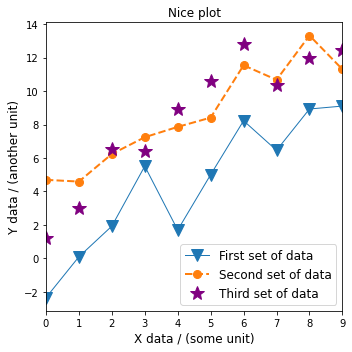

In [2]:

# generate some data to plot
# first, the x coordinates
xdata = np.arange(10)

# use the random functions to variate the y coordinates a bit
ydata_1 = np.arange(10) + np.random.normal(scale=1, size=10)
ydata_2 = np.arange(10) + np.random.normal(loc=4, scale=1, size=10)
ydata_3 = np.arange(10) + np.random.normal(loc=5, scale=3, size=10)

# simple x-y plotting function
plt.figure(figsize=(5, 5)) # set the size of the figure
# we need the x and y value,
# and optionally we choose a marker, a linestyle, linewidth, color, and a label for each graph
plt.plot(xdata, ydata_1, marker="v", markersize=12, lw=1, label="First set of data") # don't forget to label your data!
plt.plot(xdata, ydata_2, marker="o", markersize=8, lw=2, linestyle="--", label="Second set of data")
plt.plot(xdata, ydata_3, marker="*", markersize=15, lw=0, color="purple", label="Third set of data")
# set axis labels
plt.xlabel("X data / (some unit)", fontsize="large")
plt.ylabel("Y data / (another unit)", fontsize="large")
# set limits for the x-axis
plt.xlim(0, 9)
# finally, set a title and plot the legend with the labels you've given the data before
plt.title("Nice plot")
plt.legend(loc=0, fontsize="large")
# this line just makes sure that every component of the plot is where it should be 
# and nothing is lost when saving the graph to a file, but it's optional
plt.tight_layout()
# file saving
plt.savefig("nice_plot.png") # but that might not work that well in colab
# if this throws an error, comment it out

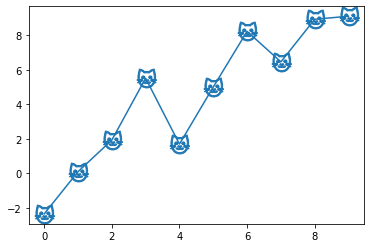

In [10]:
# you can also use unicode characters as plot markers (very important)
plt.plot(xdata, ydata_1, marker="$\U0001F431$", markersize=20)

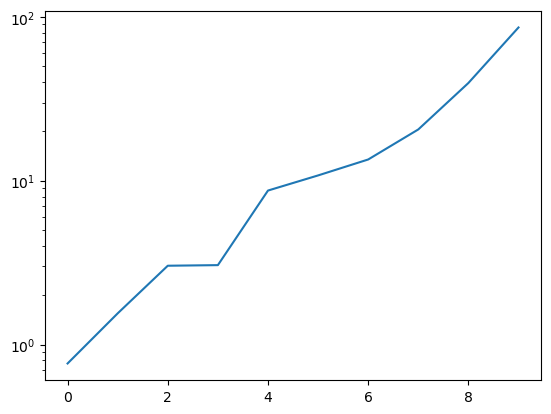

In [ ]:
ydata_3 = np.power(10, np.arange(10)/5 + np.random.normal(scale=0.1, size=10))
# you don't need the `plt.figure()` function, if you don't want to change any default settings
plt.plot(ydata_3)  # this is the most simple way to make a plot
# this uses 0, 1, 2, 3... as x-values automatically
plt.yscale("log")  # logarithmic-10 y axis


## Scatter plot


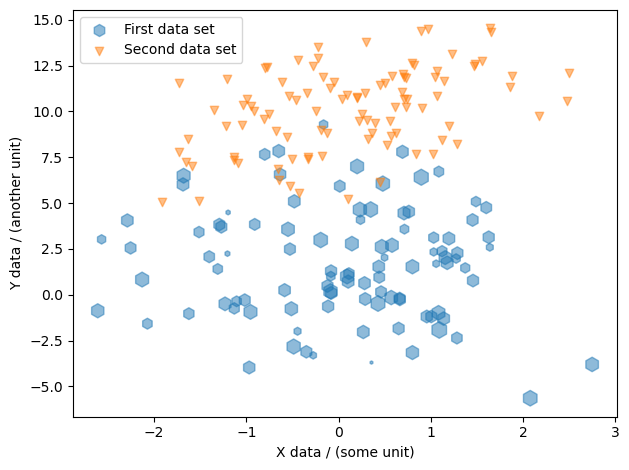

In [ ]:
# again, we generate some random data

# x and y individually
xdata_1 = np.random.normal(size=100)
ydata_1 = np.random.normal(loc=2, scale=3, size=100)

# x and y in 2D with a covariance matrix
xdata_2, ydata_2 = np.random.multivariate_normal(mean=[0, 10], cov=[[1,1], [1,5]], size=100).T
# fancy: some random sizes for the markers
size_data = np.random.normal(loc=80, scale=30, size=100) # generate different marker sizes for ydata_1

# now we plot the individual data points
plt.scatter(xdata_1, ydata_1, marker="h", alpha=0.5, s=size_data, label="First data set")
plt.scatter(xdata_2, ydata_2, marker="v", alpha=0.5, label="Second data set")
plt.legend()
plt.xlabel("X data / (some unit)")
plt.ylabel("Y data / (another unit)")
plt.tight_layout()

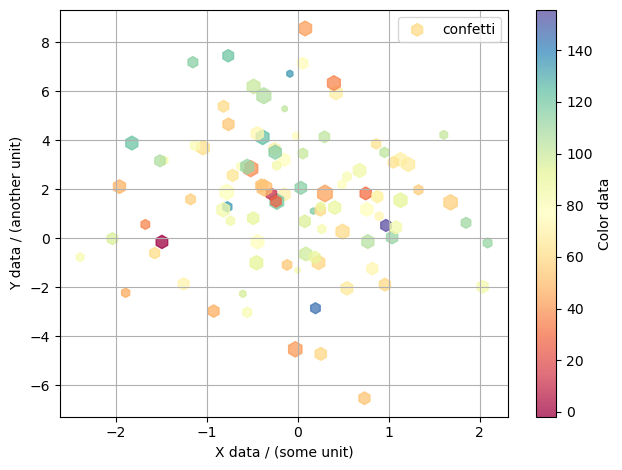

In [ ]:
# additional color and size information

# random data
xdata = np.random.normal(size=100)
ydata = np.random.normal(loc=2, scale=3, size=100)
color_data = np.random.normal(loc=80, scale=30, size=100)
size_data = np.random.normal(loc=80, scale=30, size=100)

# s is the marker size
plt.scatter(
    xdata,
    ydata,
    marker="h",
    alpha=0.75,
    c=color_data,
    cmap=plt.cm.Spectral,
    s=size_data,
    label="confetti"
)
cb = plt.colorbar()  # show the colorbar
cb.ax.set_ylabel("Color data")  # label the color axis

plt.xlabel("X data / (some unit)")
plt.ylabel("Y data / (another unit)")
plt.legend(loc=0) # 0 chooses the best position automatically
plt.grid(True) # draw axis grid lines


plt.tight_layout() # this ensures that all features of the plot fit into the canvas


## Histogram


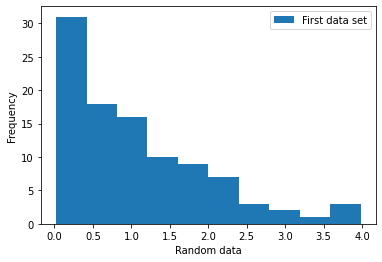

In [5]:

# generate some data
data_1 = np.random.exponential(size=100)
# histogrammize the data and plot them in one step
plt.hist(data_1, label="First data set")
#plt.plot(np.arange(5), ls="--")
# the bins are chosen automatically, default is 10 bins
plt.xlabel("Random data")
plt.ylabel("Frequency")
plt.legend(loc=1)

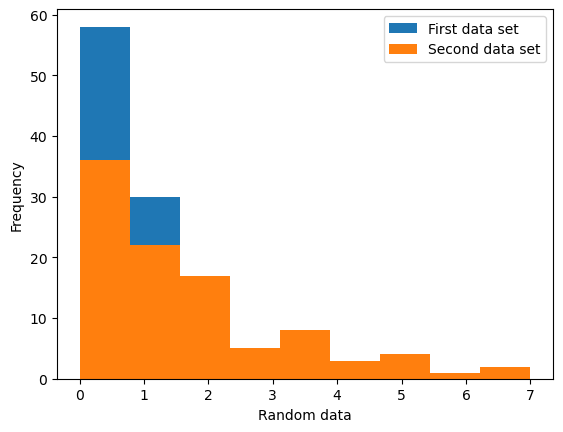

In [ ]:
# let's try to plot two data sets
# generate some data
data_1 = np.random.exponential(size=100)
data_2 = np.random.exponential(scale=2, size=100)
# histogrammize the data and plot them in one step
# we want them to have the same bins, so we set them below
plt.hist(data_1, bins=np.linspace(0, 7, 10), label="First data set")
plt.hist(data_2, bins=np.linspace(0, 7, 10), label="Second data set")

plt.xlabel("Random data")
plt.ylabel("Frequency")
plt.legend(loc=1)
# okay, that's a bit unclear, we can't see much of the first data set

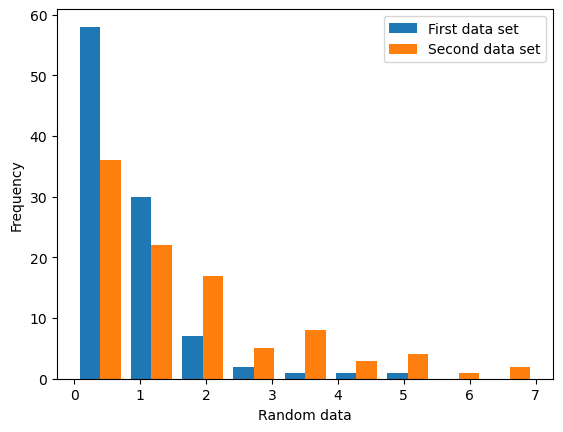

In [ ]:
plt.hist(
    [data_1, data_2], # stack the data side by side into one histogram
    bins=np.linspace(0, 7, 10), 
    label=["First data set", "Second data set"]
)
plt.xlabel("Random data")
plt.ylabel("Frequency")
plt.legend(loc=1)
# better!

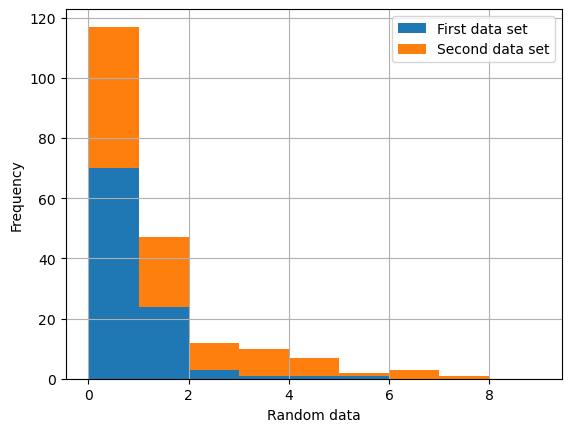

In [ ]:
plt.hist(
    [data_1, data_2], 
    bins=np.arange(0, 10), 
    label=["First data set", "Second data set"],
    histtype="barstacked" # stack the data on top of each other into one histogram
)
plt.grid(True)
plt.xlabel("Random data")
plt.ylabel("Frequency")
plt.legend(loc=1)
# fancy!

## 2D histogram example

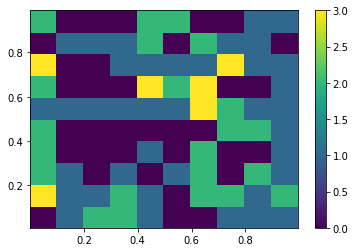

In [6]:
x = np.random.uniform(0, 1, size=100)
y = np.random.uniform(0, 1, size=100)
plt.hist2d(x, y)
plt.colorbar()
# :)

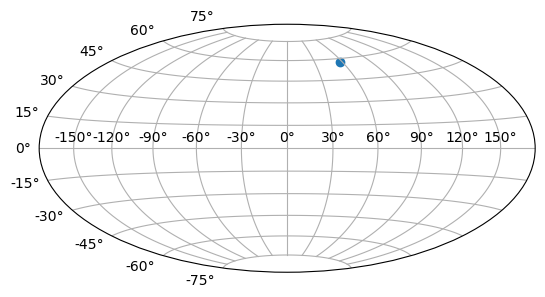

In [ ]:
# last but not least: there are different projections of graphs,
# here the hammer projection for spherical data
plt.figure()
plt.subplot(projection="hammer")
plt.scatter(1, 1) # in radian
plt.grid(True)

# Seaborn - very cool data visualization

See https://seaborn.pydata.org/examples/index.html for examples

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats

Text(0.5, 1.0, 'Large KDE bandwidth: washed out')

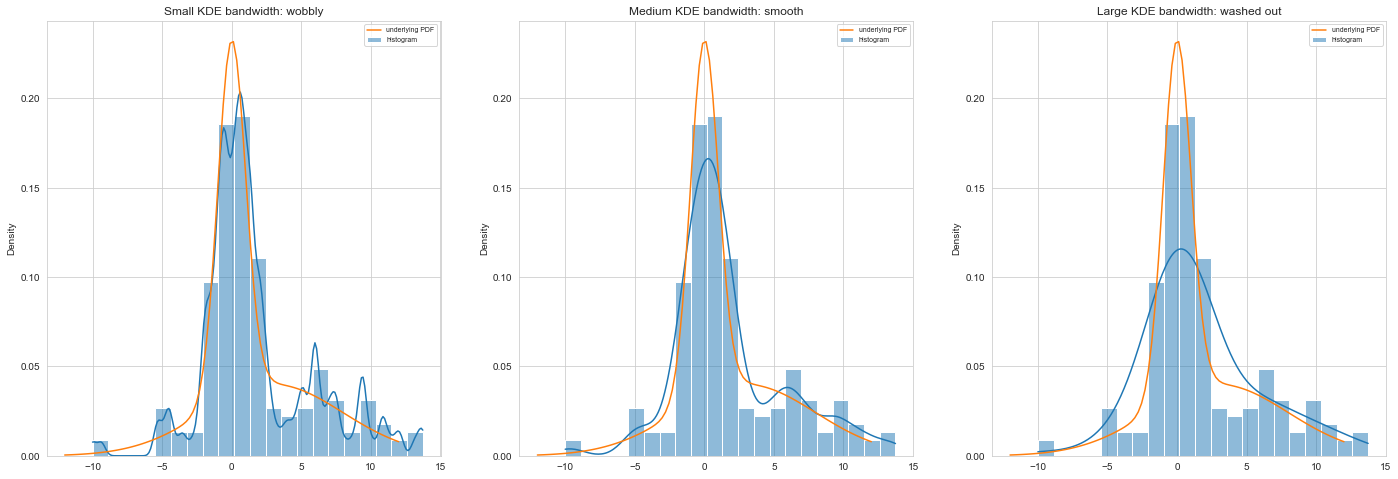

In [ ]:
# histogram 'distplot' with nice features

G = scipy.stats.norm
size = 100
data = np.random.normal(size=size)
data = np.hstack( # we stack two normal distributions with different parameters
    (data, np.random.normal(
        loc=3,
        scale=5,
        size=size)
    )
)
# Plot the distribution as histogram, overlayed with a kernel density estimate and rugplot
f, axes = plt.subplots(ncols=3, figsize=sns.mpl.rcParams["figure.figsize"]*np.array([4,2]))
# let's try different band-widths
sns.histplot(data, stat="density", kde=True, kde_kws = {"bw_adjust": 0.2}, ax=axes[0], label="histogram")
sns.histplot(data, stat="density", kde=True, kde_kws = {"bw_adjust": 0.7}, ax=axes[1], label="histogram")
sns.histplot(data, stat="density", kde=True, kde_kws = {"bw_adjust": 1.5}, ax=axes[2], label="histogram")
x = np.linspace(-12, 12, 100)
axes[0].plot(x, (G(0, 1).pdf(x) + G(3, 5).pdf(x)) / 2, label="underlying PDF", color="tab:orange")
axes[1].plot(x, (G(0, 1).pdf(x) + G(3, 5).pdf(x)) / 2, label="underlying PDF", color="tab:orange")
axes[2].plot(x, (G(0, 1).pdf(x) + G(3, 5).pdf(x)) / 2, label="underlying PDF", color="tab:orange")
axes[0].legend(loc=0, fontsize="x-small")
axes[1].legend(loc=0, fontsize="x-small")
axes[2].legend(loc=0, fontsize="x-small")
axes[0].set_title("Small KDE bandwidth: wobbly")
axes[1].set_title("Medium KDE bandwidth: smooth")
axes[2].set_title("Large KDE bandwidth: washed out")

/home/lisajsch/miniconda3/envs/PLEnuM/lib/python3.10/site-packages/scipy/stats/_multivariate.py:657: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
/home/lisajsch/miniconda3/envs/PLEnuM/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


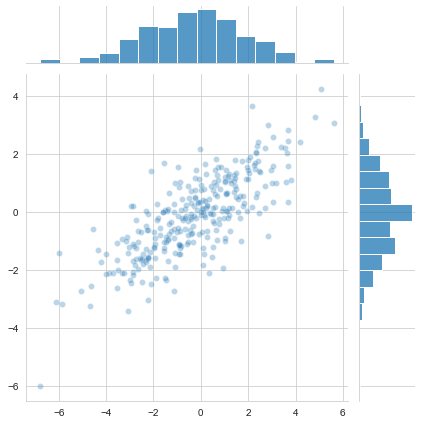

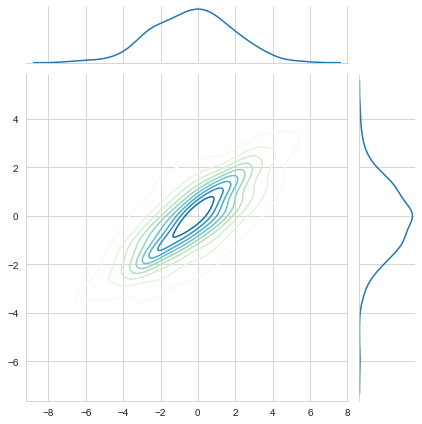

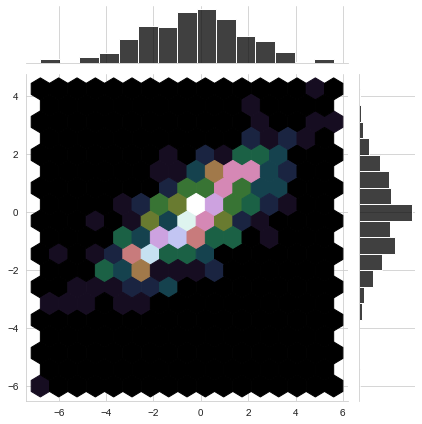

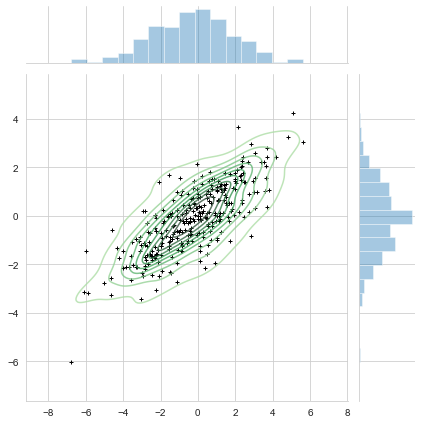

In [ ]:
# cool 2D plots with marginal distributions

data = scipy.stats.multivariate_normal.rvs(cov = [[1,0],[5,3]], size=300)

# Plot joint and mariginal distributions as scatter/histogram with transparency
sns.jointplot(x=data[:,0], y=data[:,1], alpha=0.3)
# Plot joint and mariginal distributions as kde
sns.jointplot(x=data[:,0], y=data[:,1], kind = "kde", cmap="GnBu")
# Plot joint as hex-plot, which looks really cool 8)
sns.jointplot(x=data[:,0], y=data[:,1], kind = "hex", cmap="cubehelix", color="black")

# For more control we can use JointGrid and specify the indivual
# plotting functions for the joint and marginal dists.
g = sns.JointGrid(x=data[:,0], y=data[:,1])
g.plot_joint(plt.scatter, c="k", s=10, linewidth=1, marker="+", alpha=1)
g.plot_joint(sns.kdeplot, cmap="Greens_d", alpha=0.8)
g.plot_marginals(sns.distplot, kde=False)

/home/lisajsch/miniconda3/envs/PLEnuM/lib/python3.10/site-packages/scipy/stats/_multivariate.py:657: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


<AxesSubplot:>

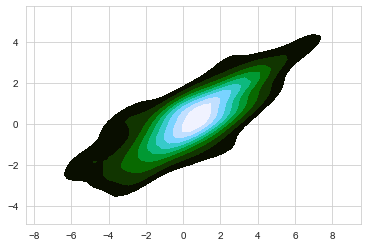

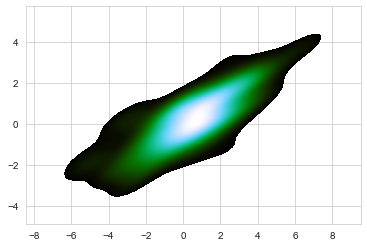

In [ ]:
data = scipy.stats.multivariate_normal.rvs(cov = [[1,0],[5,3]], size=100)

cmap = sns.cubehelix_palette(as_cmap=True, start=1.5, rot=0.5, dark=0., light=1., reverse=True, hue=2)
cmap.set_under("black")
cmap.set_bad("white")
# try different plotting resolutions
plt.figure()
sns.kdeplot(x=data[:,0], y=data[:,1], cmap=cmap, shade=True, gridsize=50, n_levels=10)

plt.figure()
sns.kdeplot(x=data[:,0], y=data[:,1], cmap=cmap, shade=True, gridsize=100, n_levels=100)

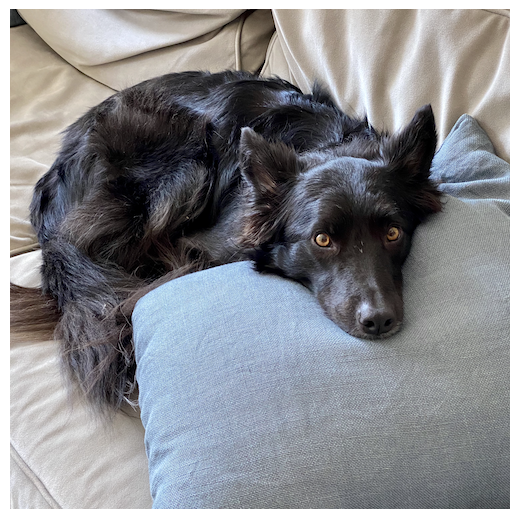

In [12]:
sns.dogplot()

/usr/local/lib/python3.7/dist-packages/scipy/stats/_multivariate.py:653: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


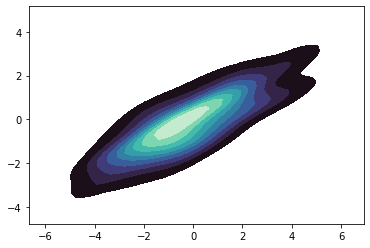

In [19]:
data = scipy.stats.multivariate_normal.rvs(cov = [[1,0],[5,3]], size=100)

# try different plotting resolutions
plt.figure()
sns.kdeplot(x=data[:,0], y=data[:,1], cmap="mako", shade=True, gridsize=50, n_levels=10)
